<a href="https://colab.research.google.com/github/krishnakantsingh14/DeepLearning/blob/develop/UniversalApproximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip install torchvision

    100% |████████████████████████████████| 512.6MB 47.1MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x585a2000 @  0x7f4322b062a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 2.0MB 1.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


Ref: https://github.com/cmudeeplearning11785/Fall2018-tutorials/blob/master/recitation-2/pytorch_example.ipynb  
https://www.youtube.com/watch?v=mWPNS4WQ900

In [0]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [0]:
def data_generation(n):
    radius = np.random.uniform(low=0, high=2,size=n).reshape(-1,1)
    angle  = np.random.uniform(low=0, high=2*np.pi, size =n).reshape(-1,1)
    x1     = radius*np.cos(angle)
    x2     = radius*np.sin(angle)
    y      = (radius<1).astype(int).reshape(-1)
    x      = np.concatenate([x1,x2], axis=1)
    return x,y

In [0]:
n_train = 10000
n_valid = 500
n_test  = 2000
train_x, train_y  = data_generation(n_train)
valid_x, valid_y = data_generation(n_valid)
test_x, test_y  = data_generation(n_test)

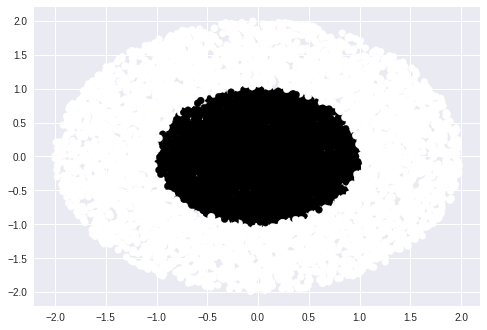

In [5]:
plt.scatter(train_x[:,0], train_x[:,1], c= train_y);

## Single hidden layer Vs. Multi layer 



In [0]:
def generate_single_layer_MLP(n_hidden_neurons):
    return nn.Sequential(nn.Linear(2,n_hidden_neurons), 
                        nn.RReLU(),
                        nn.Linear(n_hidden_neurons, 2))

In [0]:
model1 = generate_single_layer_MLP(4)

In [0]:
train_x = (torch.from_numpy(train_x).float())
train_y = torch.from_numpy(train_y).float().type(torch.LongTensor)
valid_x = torch.from_numpy(valid_x).float()
valid_y = torch.from_numpy(valid_y).float().type(torch.LongTensor)
test_x  = torch.from_numpy(test_x).float()
test_y  = torch.from_numpy(test_y).float().type(torch.LongTensor)

In [9]:
print (train_x.type())

torch.FloatTensor


In [0]:
def training_routine(net, datset, n_iters, gpu):
    train_data, train_labels, val_data, val_labels = dataset
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    training_loss  =[]
    training_accuracy = []
    validation_loss   =[]
    validation_accuracy = []
    if gpu:
        train_data, train_labels =  train_data.cuda(), train_labels.cuda()
        val_data, val_labels = val_data.cuda(), val_labels.cuda()
        net = net.cuda()
        print ("Training using GPU")
    else:
        print ("Training using CPU")
    for i in range(n_iters):
        train_output = net(train_data)
        train_loss   = criterion(train_output, train_labels)
        train_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if i%100 ==0:
#             print ("At interation", i)
            train_prediction = train_output.cpu().detach().argmax(dim=1)
            train_accuracy   = (train_prediction.cpu().numpy() == train_labels.cpu().numpy()).mean()
            val_output       = net(val_data)
            val_loss         = criterion(val_output,val_labels)
            val_prediction   = val_output.cpu().detach().argmax(dim=1)
            val_accuracy     = (val_prediction.cpu().numpy() == val_labels.cpu().numpy()).mean()
            training_loss.append(train_loss)
            validation_loss.append(val_loss)
            training_accuracy.append(train_accuracy)
            validation_accuracy.append(val_accuracy)
    plt.rcParams['figure.figsize'] = (16,8)
    ax1=plt.subplot(121, frameon=False)
    ax1.plot(training_loss, label= 'training')
    ax1.plot(validation_loss, label= 'validation')
    ax1.legend()
    ax1.set_xlabel('epoches')
    ax1.set_ylabel('Loss')
    ax2 =plt.subplot(122, frameon=False)
    ax2.plot(training_accuracy)
    ax2.plot(validation_accuracy)
    ax2.set_ylabel('Accuracy')

    
    net = net.cpu()


In [0]:
dataset = train_x.type(torch.float), train_y, valid_x.type(torch.float), valid_y

Training using GPU


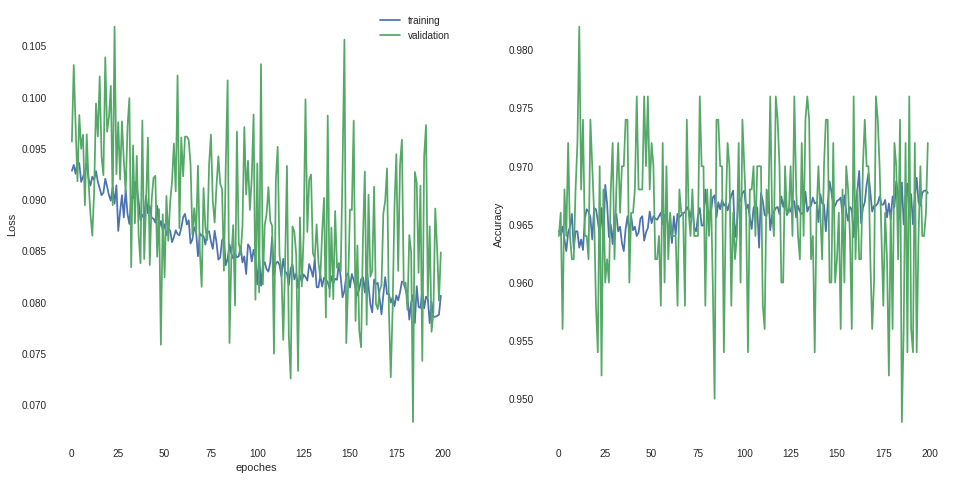

In [32]:
gpu = True
training_routine(model1, dataset, 20000, gpu)

In [0]:
def print_model(model, datapoints):
    out = model(datapoints).argmax(dim=1).detach().numpy()
    green = datapoints.cpu().numpy()[np.where(out==1)]
    red   = datapoints.cpu().numpy()[np.where(out==0)]
    circle1 = plt.Circle((0,0),1, color='y')
    circle2 = plt.Circle((0,0),1, color='r', fill = False)
    fig, ax = plt.subplots()
    
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    pos_values =plt.scatter(x =green[:,0], y =green[:,1], color='g',);
    neg_values = plt.scatter(x =red[:,0], y=red[:,1], color='r',);
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(pos_values)
    ax.add_artist(neg_values)

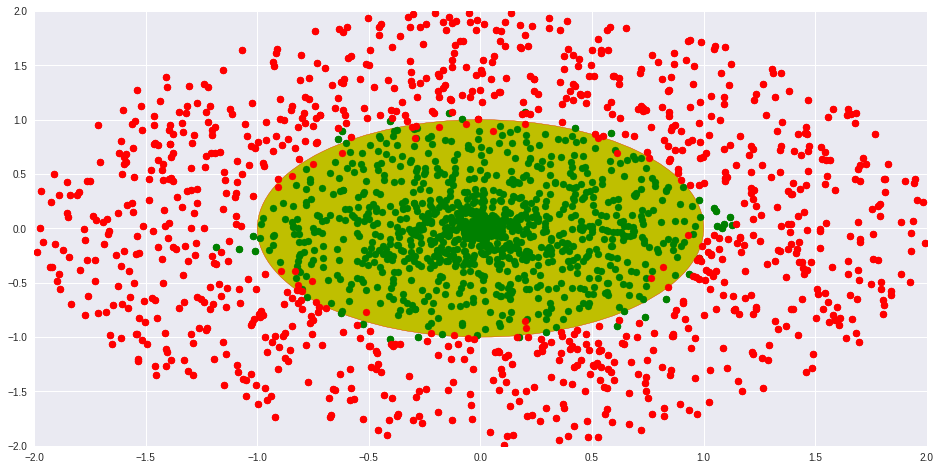

In [35]:
print_model(model1, test_x)

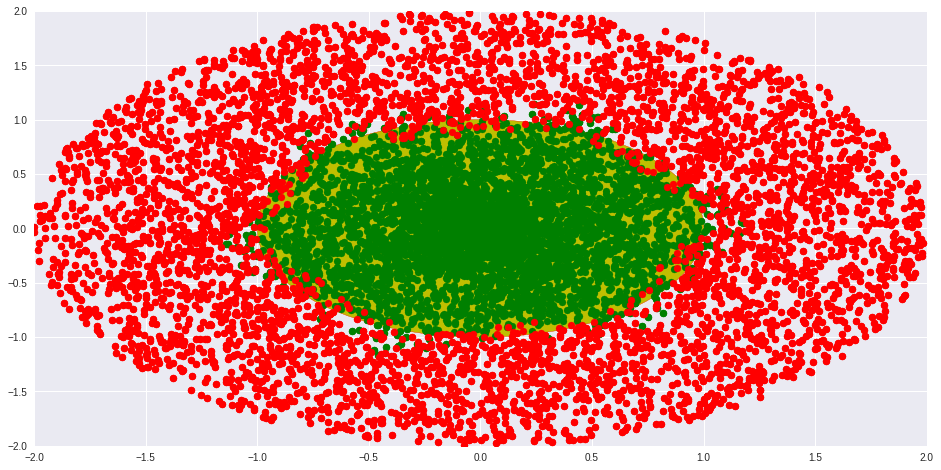

In [36]:
print_model(model1, train_x)

## With 2 neurons in hidden layer

Training using GPU


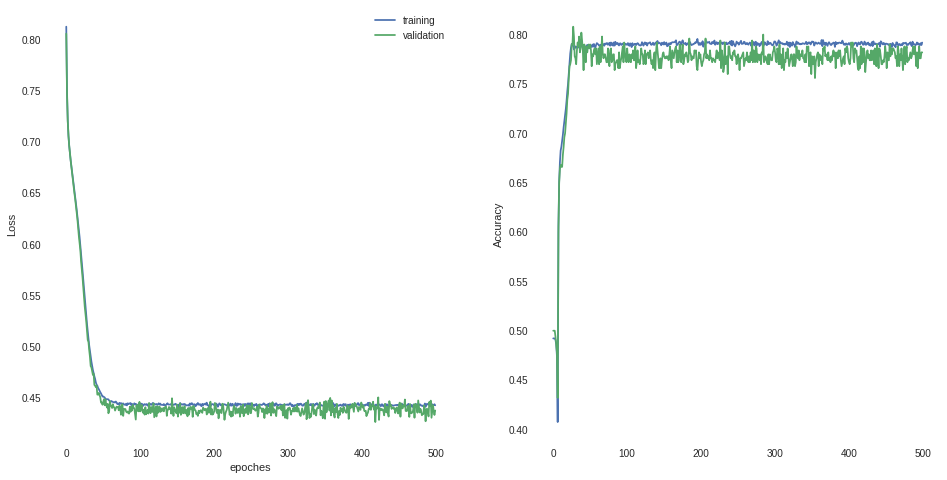

In [37]:
model2 = generate_single_layer_MLP(2)
training_routine(model2, dataset, 50000, gpu)

### With two layers in the hidden layer, we can except two linear boundry 

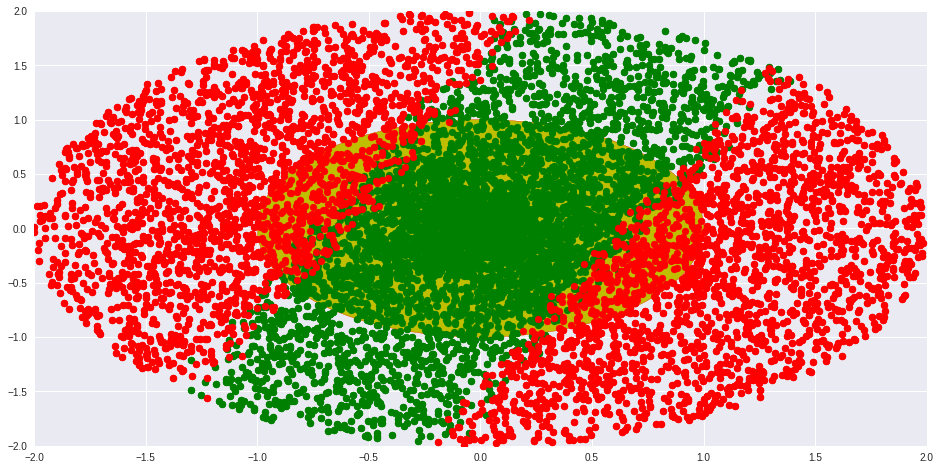

In [39]:
print_model(model2, train_x)

### With three layers in the hidden layer, we can except three linear boundry 

Training using GPU


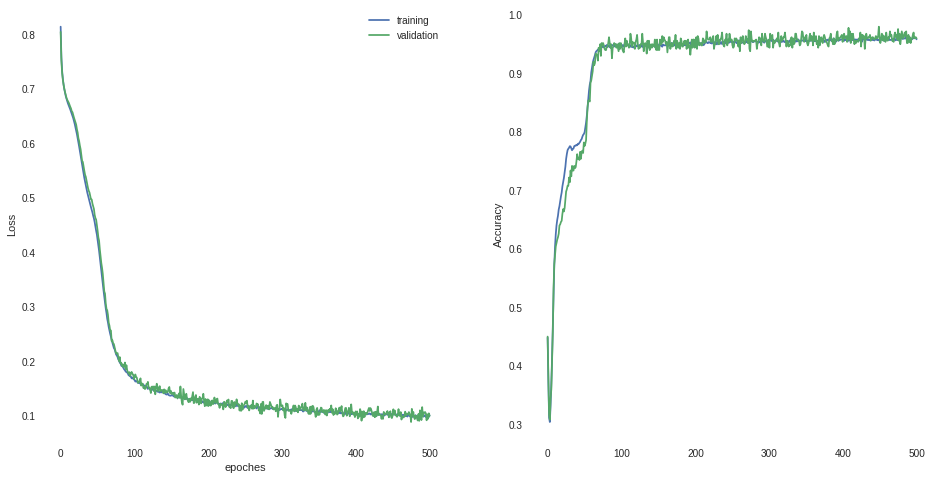

In [40]:
model3 = generate_single_layer_MLP(3)
training_routine(model3, dataset, 50000, gpu)

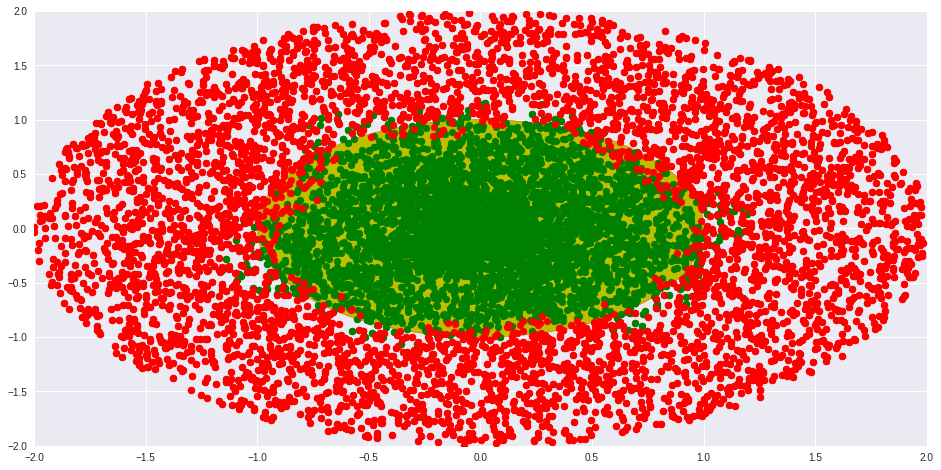

In [41]:
print_model(model3, train_x)

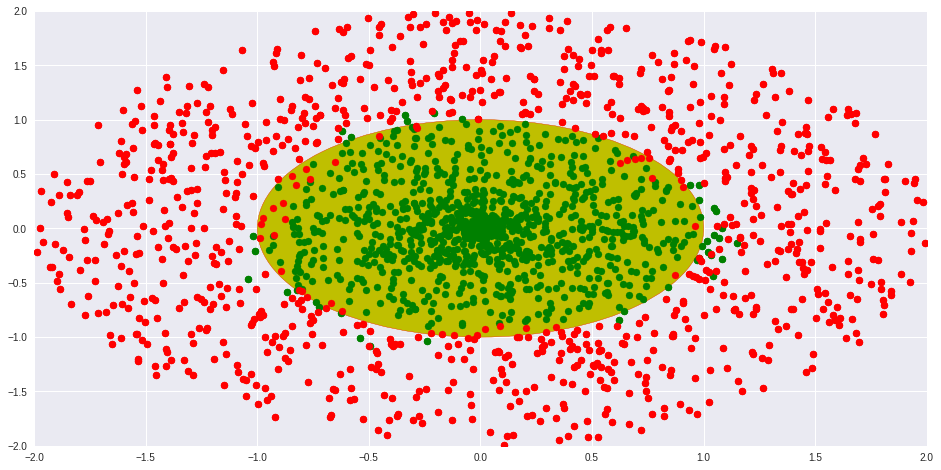

In [42]:
print_model(model3, test_x)

Training using GPU


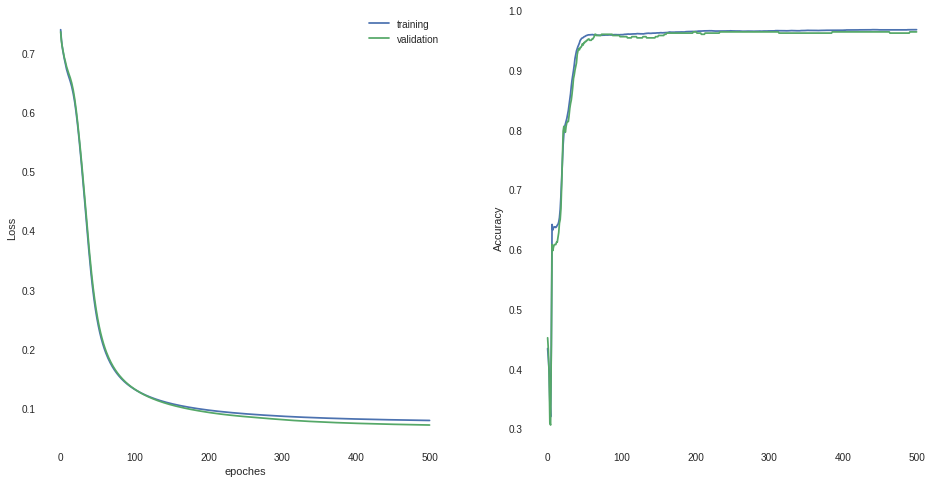

In [43]:
model4 = generate_single_layer_MLP(4)
training_routine(model4, dataset, 50000, gpu)

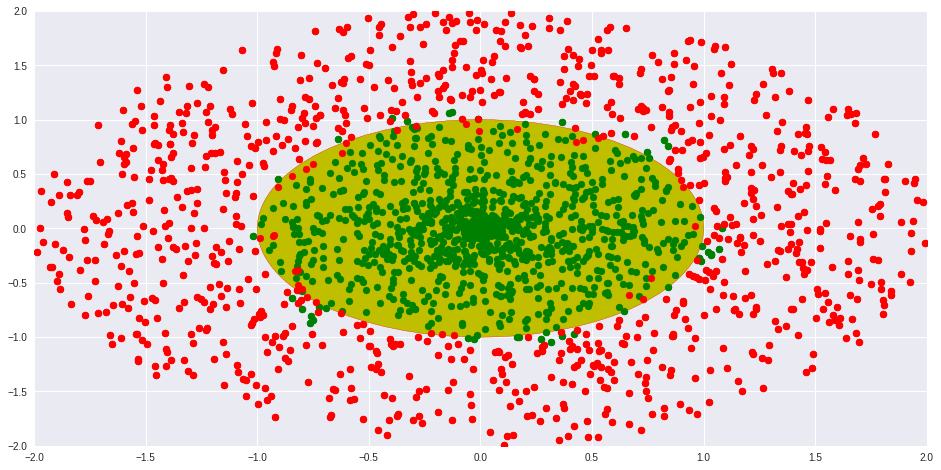

In [44]:
print_model(model4, test_x)

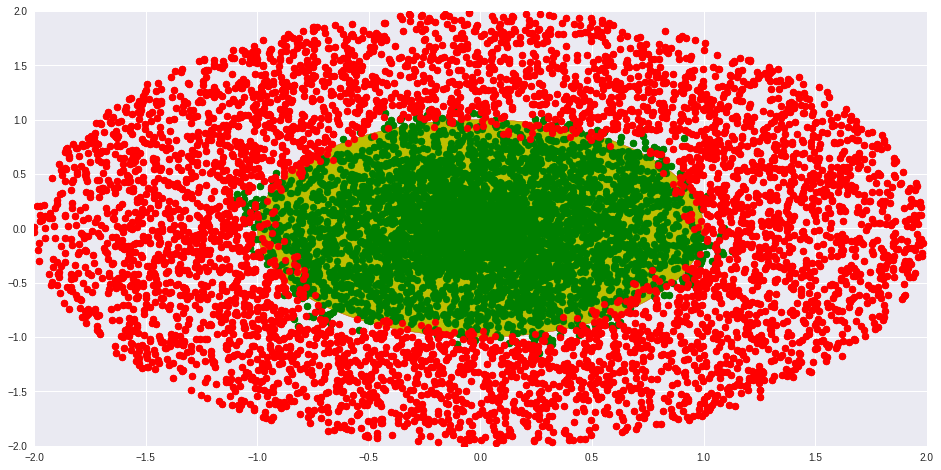

In [45]:
print_model(model4, train_x)

In [6]:
from sklearn import cluster, datasets
from sklearn.cross_validation import train_test_split


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
n_samples = 100000
noisy_circles, circle_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)


In [0]:
n_samples = 100000

noisy_moons_x, moons_y = datasets.make_moons(n_samples=n_samples, noise=.05)


## Non linear data 

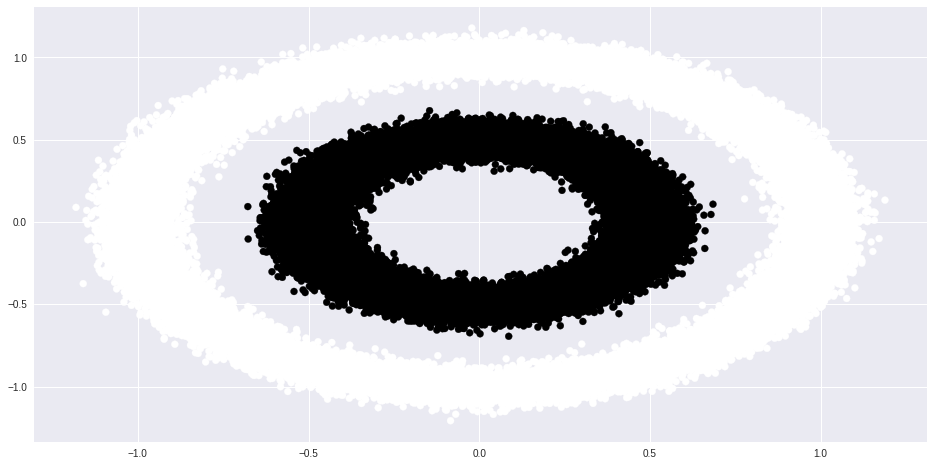

In [58]:
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c= circle_y)

In [0]:
# plt.scatter(noisy_moons_x[:,0], noisy_moons_x[:,1], c= moons_y)

In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(noisy_circles, circle_y,  test_size=0.75, random_state=42)

In [0]:
train_x = (torch.from_numpy(train_x).float())
train_y = torch.from_numpy(train_y).float().type(torch.LongTensor)
valid_x = torch.from_numpy(valid_x).float()
valid_y = torch.from_numpy(valid_y).float().type(torch.LongTensor)


### Let's work with 3 neurons in the input layer

In [0]:
model_circle4 = generate_single_layer_MLP(4)
dataset = train_x.type(torch.float), train_y, valid_x.type(torch.float), valid_y


In [71]:
train_x.shape, train_y.shape

(torch.Size([25000, 2]), torch.Size([25000]))

Training using GPU


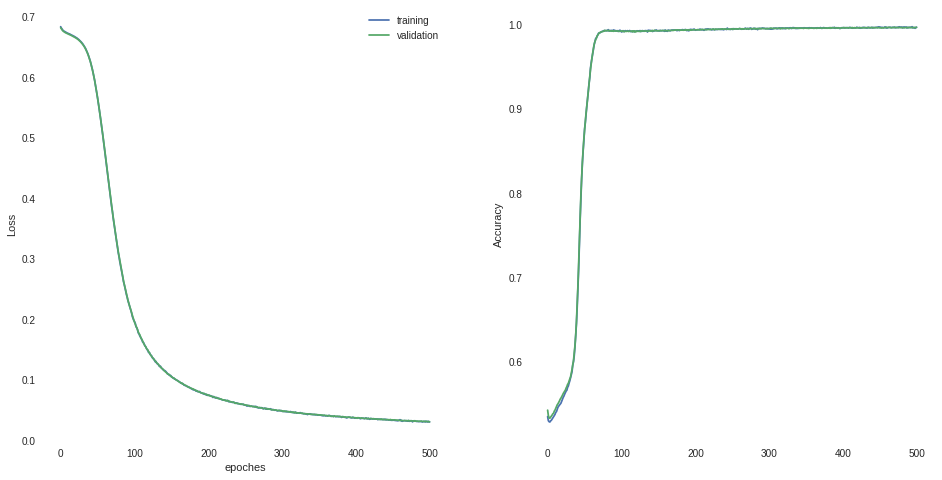

In [72]:
training_routine(model_circle4, dataset, 50000, gpu)

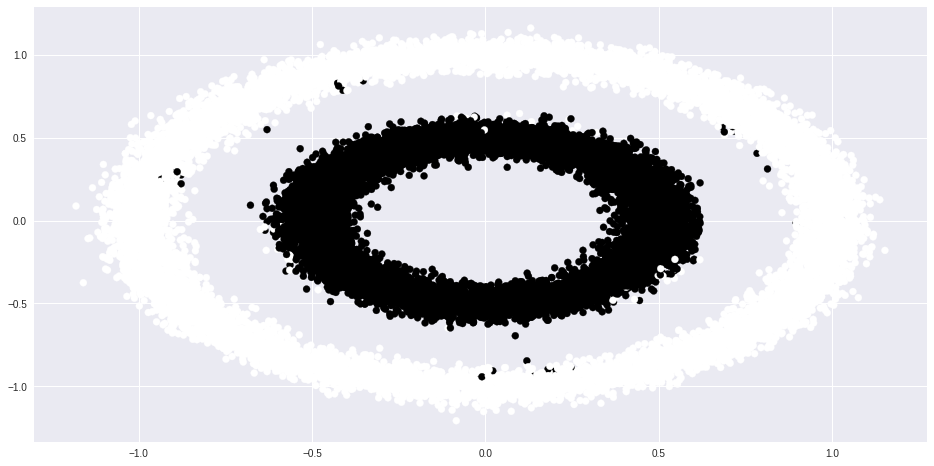

In [75]:
pred_y = model_circle4(train_x).argmax(dim=1).detach().numpy()
tx = train_x.detach().numpy()
plt.scatter(tx[:,0], tx[:,1], c=pred_y)

### Using 10 neurons

Training using GPU


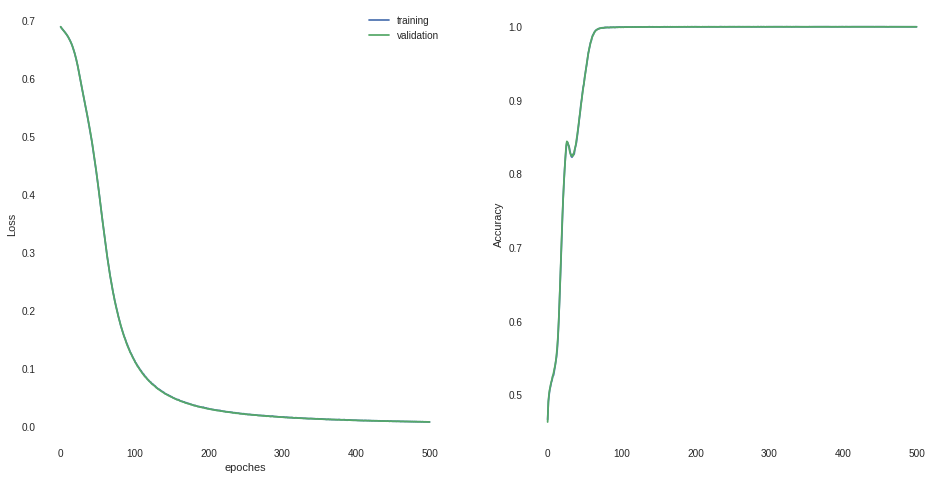

In [78]:
model_circle10 = generate_single_layer_MLP(10)
train_x, valid_x, train_y, valid_y = train_test_split(noisy_circles, circle_y,  test_size=0.75, random_state=42)
train_x = (torch.from_numpy(train_x).float())
train_y = torch.from_numpy(train_y).float().type(torch.LongTensor)
valid_x = torch.from_numpy(valid_x).float()
valid_y = torch.from_numpy(valid_y).float().type(torch.LongTensor)
dataset = train_x.type(torch.float), train_y, valid_x.type(torch.float), valid_y

training_routine(model_circle10, dataset, 50000, gpu)

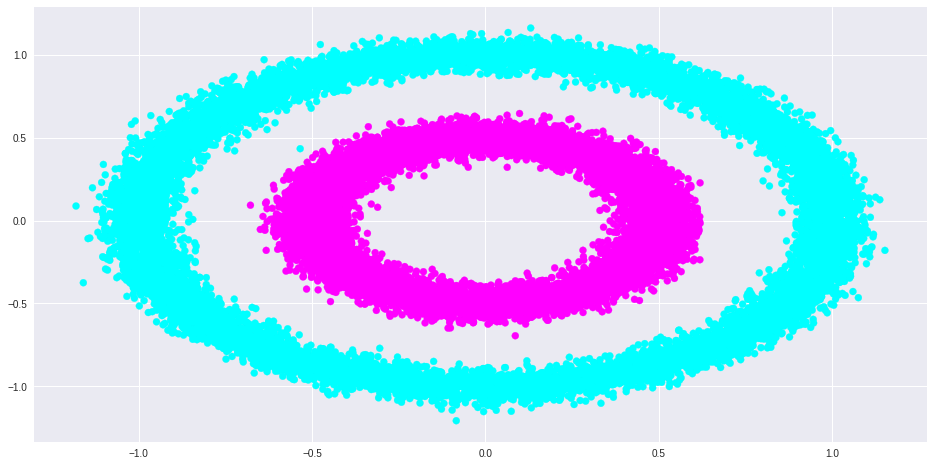

In [82]:
pred_y = (model_circle10(train_x).argmax(dim=1).detach().numpy())
tx = train_x.detach().numpy()
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')

### Let's work on moon data

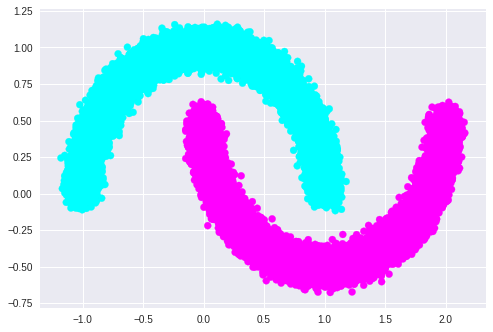

In [8]:
plt.scatter(noisy_moons_x[:,0], noisy_moons_x[:,1], c= moons_y, cmap= 'cool')

Using 4 ,6, 10 neurons

Training using GPU


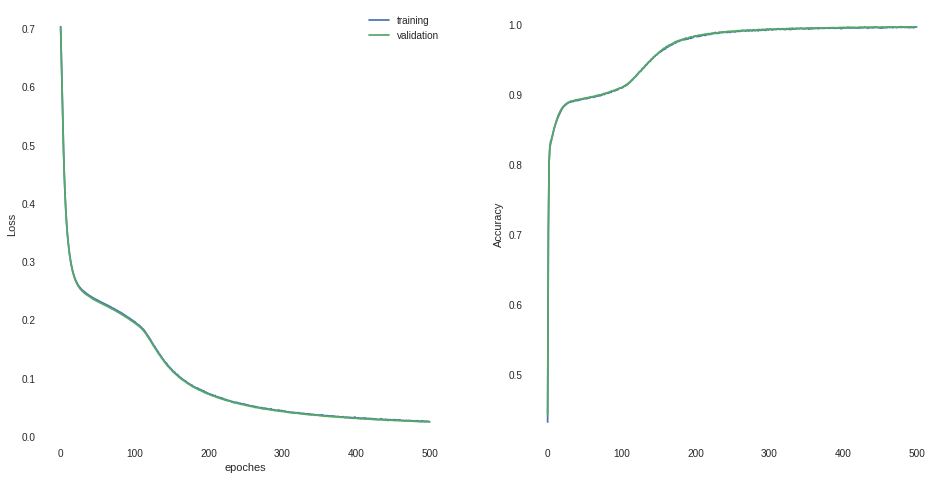

In [12]:
model_moon_4 = generate_single_layer_MLP(4)
train_x, valid_x, train_y, valid_y = train_test_split(noisy_moons_x, moons_y,  test_size=0.75, random_state=42)
train_x = (torch.from_numpy(train_x).float())
train_y = torch.from_numpy(train_y).float().type(torch.LongTensor)
valid_x = torch.from_numpy(valid_x).float()
valid_y = torch.from_numpy(valid_y).float().type(torch.LongTensor)
dataset = train_x.type(torch.float), train_y, valid_x.type(torch.float), valid_y
gpu = True
training_routine(model_moon_4, dataset, 50000, gpu)

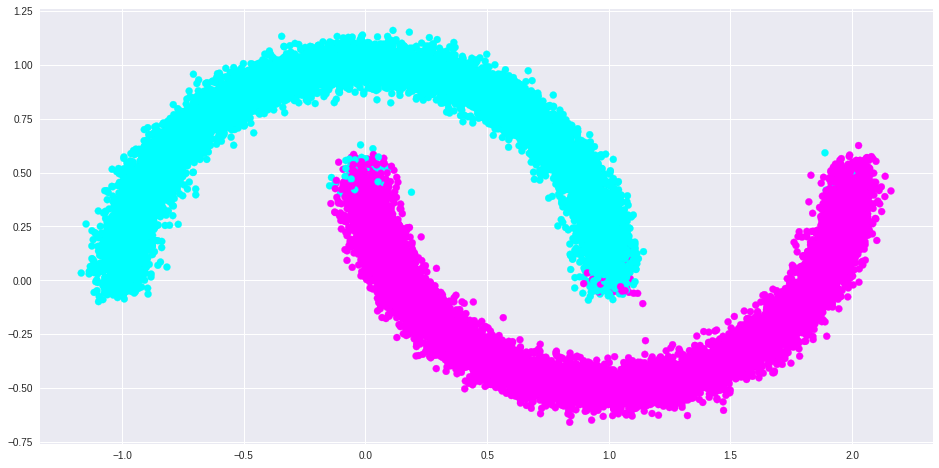

In [14]:
pred_y = (model_moon_4(train_x).argmax(dim=1).detach().numpy())
tx = train_x.detach().numpy()
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')

Training using GPU


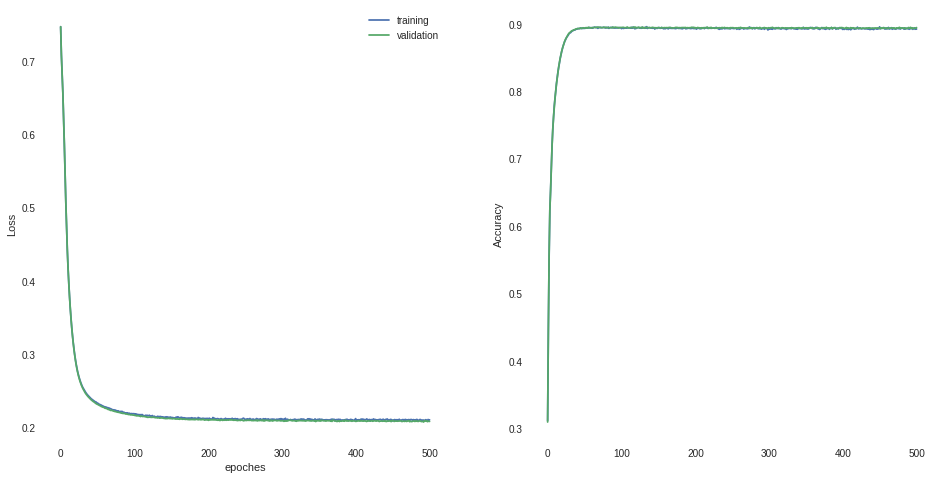

In [16]:
model_moon_2 = generate_single_layer_MLP(2)
gpu =True
training_routine(model_moon_2, dataset, 50000, gpu)

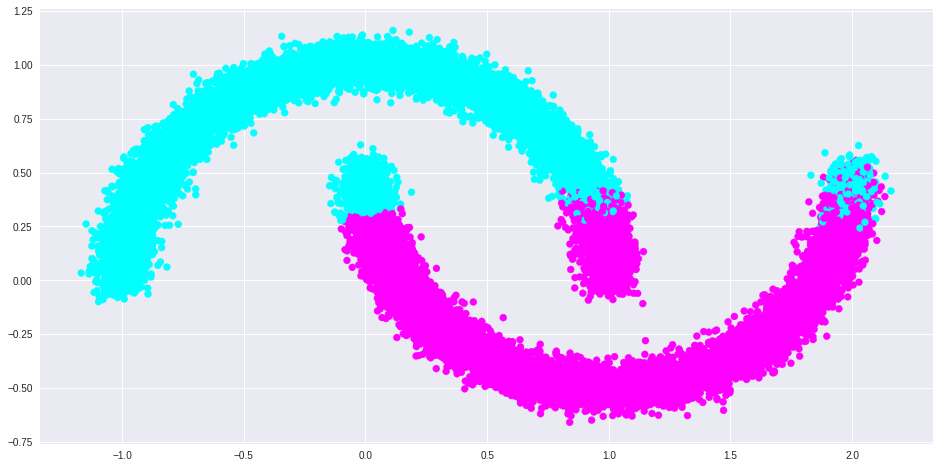

In [17]:
pred_y = (model_moon_2(train_x).argmax(dim=1).detach().numpy())
tx = train_x.detach().numpy()
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')

Training using GPU


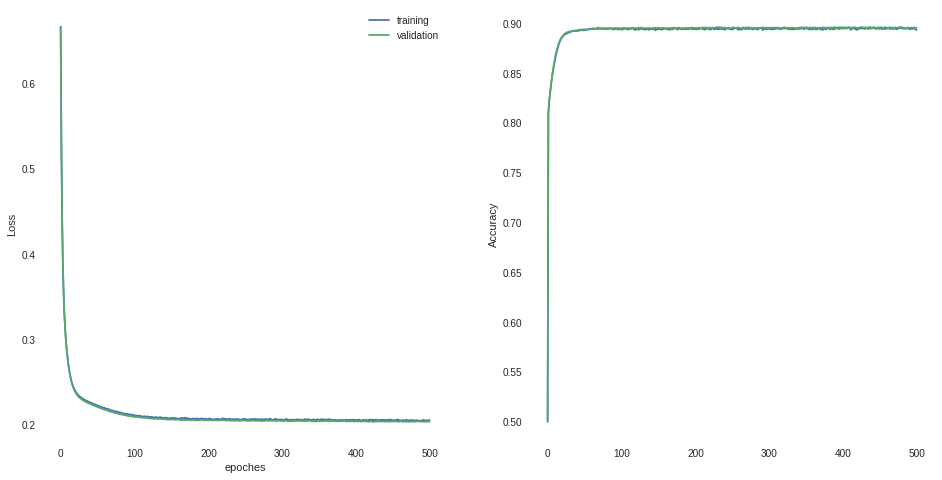

In [18]:
model_moon_10 = generate_single_layer_MLP(10)
gpu =True
training_routine(model_moon_10, dataset, 50000, gpu)

In [0]:
nx, ny = (100, 100)

x = np.linspace(-1, 2, nx)
y = np.linspace(-1, 2, ny)
xv, yv = np.meshgrid(x, y)
xv = xv.reshape(-1,1)
yv = yv.reshape(-1,1)
tx = np.concatenate([xv, yv], axis=1)


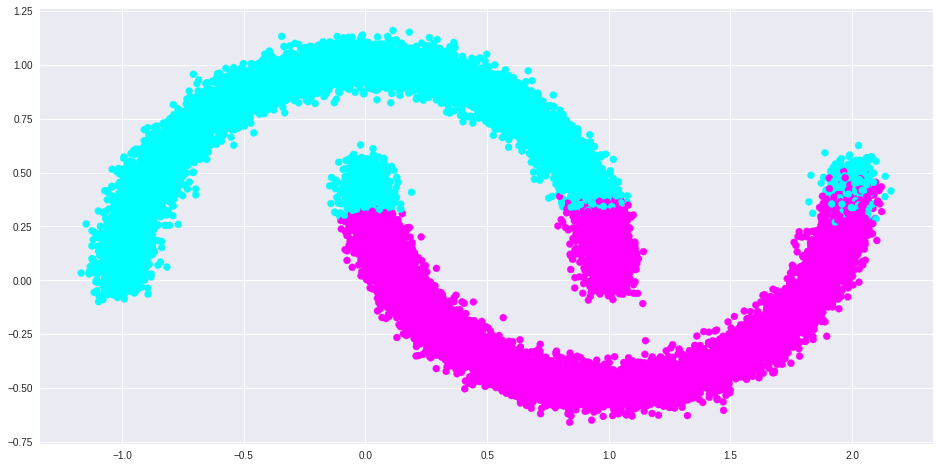

In [19]:
pred_y = (model_moon_10(train_x).argmax(dim=1).detach().numpy())
tx = train_x.detach().numpy()
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')

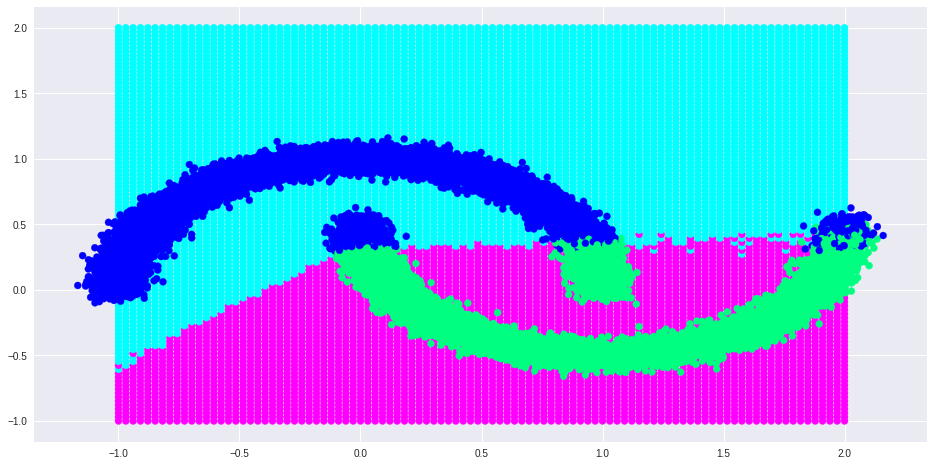

In [63]:
pred_y = (model_moon_10((torch.from_numpy(tx).float())).argmax(dim=1).detach().numpy())
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')
pred_y = (model_moon_10(train_x).argmax(dim=1).detach().numpy())
tr = train_x.detach().numpy()
plt.scatter(tr[:,0], tr[:,1], c=pred_y, cmap='winter')

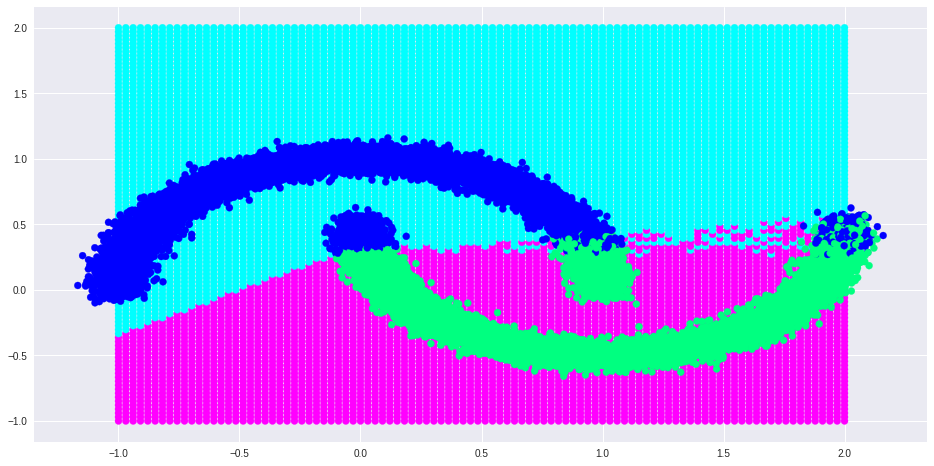

In [62]:
pred_y = (model_moon_2((torch.from_numpy(tx).float())).argmax(dim=1).detach().numpy())
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')
pred_y = (model_moon_2(train_x).argmax(dim=1).detach().numpy())
tr = train_x.detach().numpy()
plt.scatter(tr[:,0], tr[:,1], c=pred_y, cmap='winter')

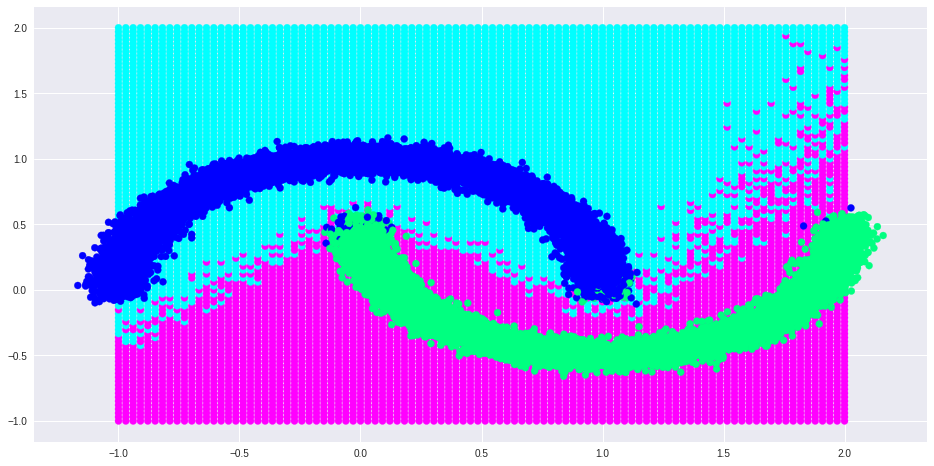

In [61]:
pred_y = (model_moon_4((torch.from_numpy(tx).float())).argmax(dim=1).detach().numpy())
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')
pred_y = (model_moon_4(train_x).argmax(dim=1).detach().numpy())
tr = train_x.detach().numpy()
plt.scatter(tr[:,0], tr[:,1], c=pred_y, cmap='winter')

Training using GPU


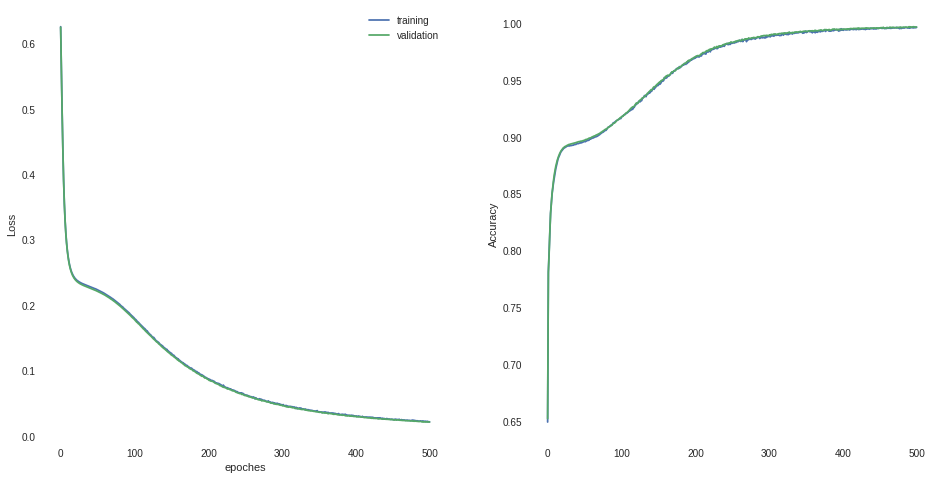

In [64]:
model_moon_6 = generate_single_layer_MLP(6)
gpu =True
training_routine(model_moon_6, dataset, 50000, gpu)

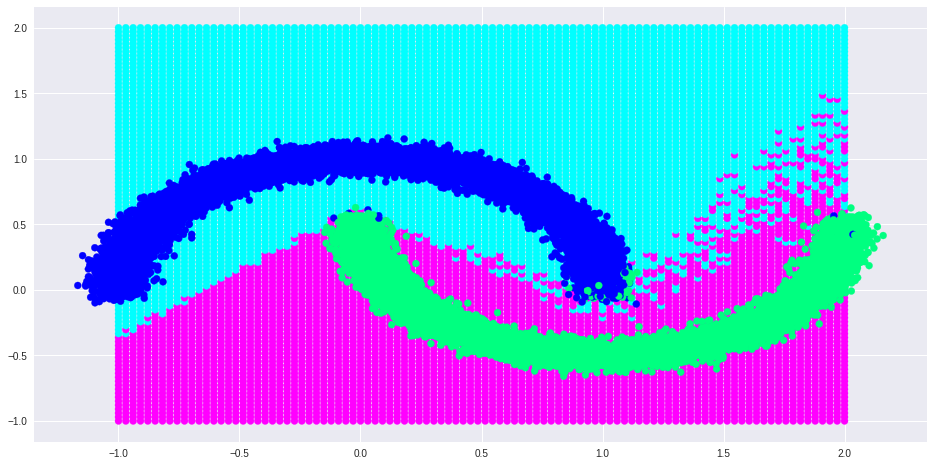

In [65]:
pred_y = (model_moon_6((torch.from_numpy(tx).float())).argmax(dim=1).detach().numpy())
plt.scatter(tx[:,0], tx[:,1], c=pred_y, cmap='cool')
pred_y = (model_moon_6(train_x).argmax(dim=1).detach().numpy())
tr = train_x.detach().numpy()
plt.scatter(tr[:,0], tr[:,1], c=pred_y, cmap='winter')